In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import glob

In [ ]:
x = glob.glob("/content/drive/My Drive/Project 1 /Data/Clean Data/*.csv")

In [ ]:
# Only here cause the whole clean data is already in the folder
del x[-1]

In [ ]:
x

['/content/drive/My Drive/Project 1 /Data/Clean Data/hate-crime-arrests-by-motivation-annual-2019.csv',
 '/content/drive/My Drive/Project 1 /Data/Clean Data/hate-crime-arrests-by-motivation-annual-2017.csv',
 '/content/drive/My Drive/Project 1 /Data/Clean Data/hate-crime-arrests-by-motivation-annual-2018.csv']

In [ ]:
d19 = pd.read_csv(x[0])
d18 = pd.read_csv(x[2])
d17 = pd.read_csv(x[1])



In [ ]:
d19["Year"] = 2019
d18["Year"] = 2018
d17["Year"] = 2017

d17 = d17.rename(columns={"Bias Motivation" : "Bias-Motivation", " Age" : "Age"})
d17


,Precinct,Number,Gender,Race,Age,Bias-Motivation,Year
0,1,1,Male,White,40,Anit-Other Religion,2017
1,1,2,Male,Black,29,Anti-White,2017
2,6,3,Male,White,48,Anti-Asian,2017
3,6,4,Male,White,32,Anti-LGBT,2017
4,6,5,Male,White,59,Anti-Black,2017
...,...,...,...,...,...,...,...
130,120,131,Female,White,38,Anti-LGBT,2017
131,120,132,Male,Black,20,Anti-LGBT,2017
132,121,133,Male,White,57,Anti-Hispanic,2017
133,122,134,Female,White,44,Anti-Black,2017


In [ ]:
print(d17.shape[0])
print(d18.shape[0])
print(d19.shape[0])

135
150
133


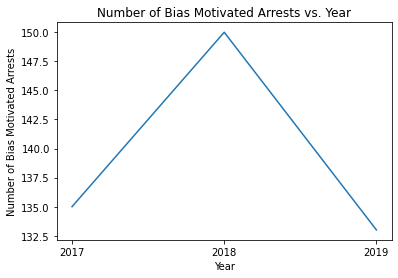

In [ ]:
X = [2017, 2018, 2019]
y = [135, 150, 133]

plt.plot(X, y)
plt.xlabel("Year")
plt.ylabel("Number of Bias Motivated Arrests")
plt.title("Number of Bias Motivated Arrests vs. Year")
plt.xticks(np.arange(2017, 2020, 1.0))
plt.show()

In [ ]:
full = pd.concat([d19, d18, d17])
full

,Number,Precinct,Gender,Race,Age,Bias-Motivation,Year
0,1,1,Female,White,64,Anti-Islamic (Muslim),2019
1,2,5,Female,White,49,Anti-Hispanic,2019
2,3,5,Male,White,44,Anti-Islamic (Muslim),2019
3,4,5,Male,Black,41,Anti-White,2019
4,5,6,Male,Black,21,Anti-Jewish,2019
...,...,...,...,...,...,...,...
130,131,120,Female,White,38,Anti-LGBT,2017
131,132,120,Male,Black,20,Anti-LGBT,2017
132,133,121,Male,White,57,Anti-Hispanic,2017
133,134,122,Female,White,44,Anti-Black,2017


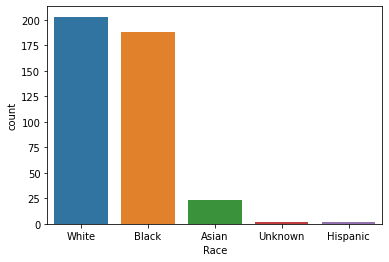

In [ ]:
sns.countplot(x = "Race", data = full)

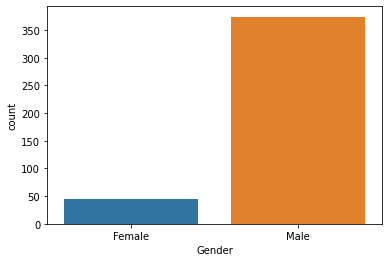

In [ ]:
sns.countplot(x = "Gender", data = full)

Anti-Jewish                              139
Anti-male homosexual (Gay)                51
Anti-Islamic (Muslim)                     49
Anti-LGBT                                 40
Anti-Black                                39
Anti-White                                27
Anti-Hispanic                             10
Anti-transgender                           9
Anti-Asian                                 8
Anti-Transgender                           8
Anit-Other Religion                        8
Anti-other  ethnicity/national origin      6
Anti-Other Ethnicity                       6
Anti-other religion                        3
Anti-Catholic                              2
Anti-Gender Non-Conforming                 2
Anti-Arab                                  2
Anti-LGBT (mixed group)                    2
Anti-60 Years old or more                  2
Anti-female homosexual (Lesbian)           2
Undetermind                                1
Anti-Mormon                                1
Anti-multi

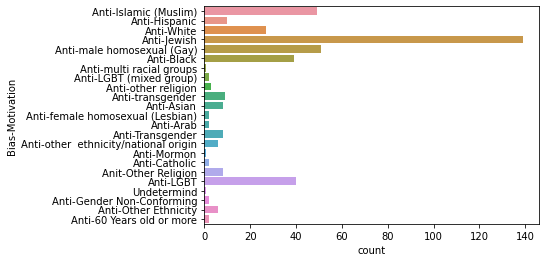

In [ ]:
sns.countplot(y = "Bias-Motivation", data = full)
full["Bias-Motivation"].value_counts()


In [ ]:
full.groupby(['Race', 'Bias-Motivation']).size()

Race      Bias-Motivation                      
Asian     Anti-Black                                1
          Anti-Catholic                             1
          Anti-Islamic (Muslim)                     4
          Anti-Jewish                               9
          Anti-LGBT                                 2
          Anti-Other Ethnicity                      1
          Anti-male homosexual (Gay)                5
Black     Anit-Other Religion                       2
          Anti-Arab                                 1
          Anti-Asian                                2
          Anti-Black                                2
          Anti-Gender Non-Conforming                2
          Anti-Hispanic                             5
          Anti-Islamic (Muslim)                    16
          Anti-Jewish                              61
          Anti-LGBT                                27
          Anti-LGBT (mixed group)                   2
          Anti-Other Ethnicity    

In [ ]:
full.groupby(['Gender', 'Bias-Motivation']).size()

Gender  Bias-Motivation                      
Female  Anti-60 Years old or more                  1
        Anti-Black                                 3
        Anti-Hispanic                              3
        Anti-Islamic (Muslim)                     11
        Anti-Jewish                                9
        Anti-LGBT                                  5
        Anti-Transgender                           2
        Anti-White                                 2
        Anti-male homosexual (Gay)                 2
        Anti-other  ethnicity/national origin      3
        Anti-transgender                           3
Male    Anit-Other Religion                        8
        Anti-60 Years old or more                  1
        Anti-Arab                                  2
        Anti-Asian                                 8
        Anti-Black                                36
        Anti-Catholic                              2
        Anti-Gender Non-Conforming                 2


In [ ]:
full.groupby(['Race', 'Bias-Motivation']).size()

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
full.groupby(['Age', 'Bias-Motivation']).size()

Age  Bias-Motivation                      
11   Anti-Jewish                               1
12   Anti-Asian                                1
     Anti-Islamic (Muslim)                     1
     Anti-Jewish                               5
13   Anti-Islamic (Muslim)                     2
     Anti-Jewish                               2
     Anti-LGBT                                 2
14   Anti-Islamic (Muslim)                     5
     Anti-Jewish                               1
     Anti-LGBT                                 3
     Anti-White                                1
15   Anti-Black                                1
     Anti-Islamic (Muslim)                     3
     Anti-LGBT                                 1
16   Anti-Black                                2
     Anti-Islamic (Muslim)                     1
     Anti-Jewish                               5
     Anti-Other Ethnicity                      1
     Anti-White                                2
     Anti-male homosexual 

In [ ]:
full.groupby(['Bias-Motivation', 'Year']).size()

Bias-Motivation                        Year
Anit-Other Religion                    2017     8
Anti-60 Years old or more              2017     2
Anti-Arab                              2018     1
                                       2019     1
Anti-Asian                             2017     3
                                       2018     2
                                       2019     3
Anti-Black                             2017    17
                                       2018    13
                                       2019     9
Anti-Catholic                          2018     2
Anti-Gender Non-Conforming             2017     2
Anti-Hispanic                          2017     3
                                       2018     3
                                       2019     4
Anti-Islamic (Muslim)                  2017    22
                                       2018    10
                                       2019    17
Anti-Jewish                            2017    23
      